<a href="https://colab.research.google.com/github/nandinisingh7/Computer-Vision/blob/main/Nandini_Singh_CV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nandini Singh

1032211677

Batch A2

CV Experiment 5

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.io import imshow
from google.colab.patches import cv2_imshow

In [ ]:
img1=cv2.imread('/content/reference_image.jpeg')
img2=cv2.imread('/content/aligned_image.jpeg')

array([[[117, 117, 117],
        [123, 123, 123],
        [120, 120, 120],
        ...,
        [244, 244, 244],
        [255, 255, 255],
        [229, 229, 229]],

       [[115, 115, 115],
        [111, 111, 111],
        [101, 101, 101],
        ...,
        [238, 238, 238],
        [255, 255, 255],
        [232, 232, 232]],

       [[100, 100, 100],
        [112, 112, 112],
        [116, 116, 116],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [253, 253, 253]],

       ...,

       [[184, 184, 184],
        [189, 189, 189],
        [182, 182, 182],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[172, 172, 172],
        [176, 176, 176],
        [169, 169, 169],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[158, 158, 158],
        [161, 161, 161],
        [152, 152, 152],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]]], dtype=uint8)
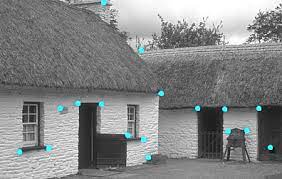

In [ ]:
img1
img2

In [ ]:
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

array([[255, 255, 255, ..., 251, 248, 239],
       [255, 255, 255, ..., 239, 233, 248],
       [255, 255, 255, ..., 232, 232, 251],
       ...,
       [241, 219, 112, ..., 255, 255, 255],
       [235, 142, 115, ..., 255, 255, 255],
       [174, 156, 208, ..., 255, 255, 255]], dtype=uint8)
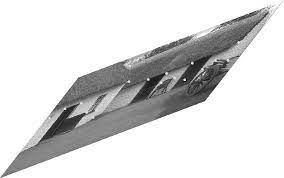

In [ ]:
img1 #check arrays to verify if its converted to grayscale

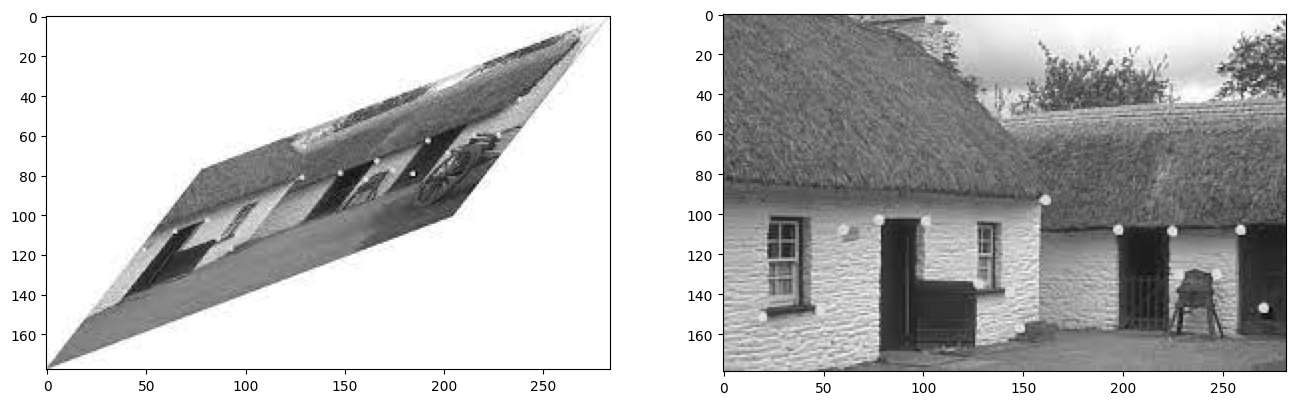

In [ ]:
figure, ax=plt.subplots(1,2, figsize=(16,8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

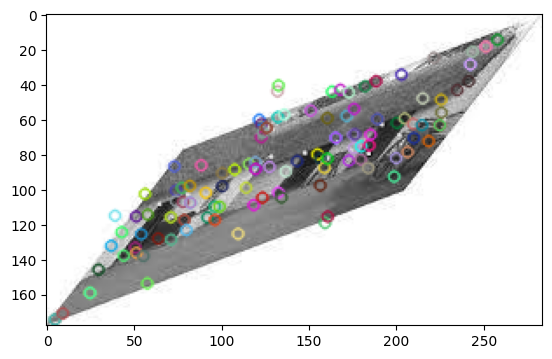

In [ ]:
sift=cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1=sift.detectAndCompute(img1,None)
image1=cv2.drawKeypoints(img1,keypoints_1,img1)
plt.imshow(image1)

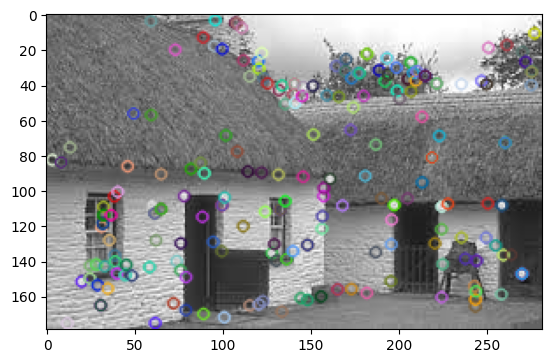

In [ ]:
keypoints_2, descriptors_2=sift.detectAndCompute(img2,None)
image2=cv2.drawKeypoints(img2,keypoints_2,img2)
plt.imshow(image2)

In [ ]:
len(keypoints_1), len(keypoints_2)

(119, 223)

In [ ]:
# Feature Matching
bf=cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches=bf.match(descriptors_1, descriptors_2)

In [ ]:
matches=sorted(matches, key=lambda x:x.distance)

In [ ]:
len(matches)

29

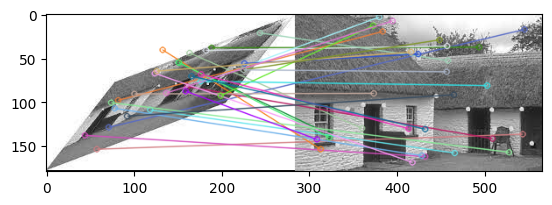

In [ ]:
img3=cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:200], img2, flags=2)
plt.imshow(img3)

In [ ]:
# Extract matched keypoints
src_pts=np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1,1,2) #this extracts x,y coordinates of keypoints for img1
dst_pts=np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

In [ ]:
# Perform perspective transformation
M,_=cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [ ]:
# Apply perspective transformation on first image
registered_image=cv2.warpPerspective(image1, M, dsize=(image2.shape[1], image2.shape[0]))  #img1 is getting transformed to be like 2

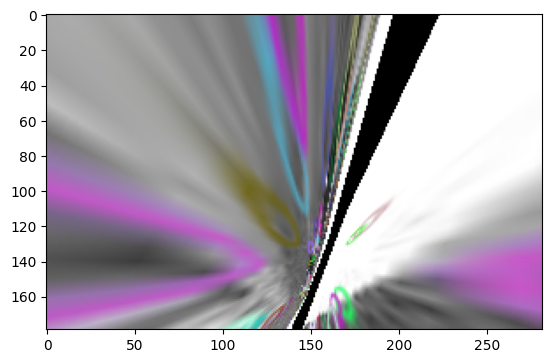

In [ ]:
# Display registered image
plt.imshow(registered_image)

Text(0.5, 1.0, 'Registered Image')

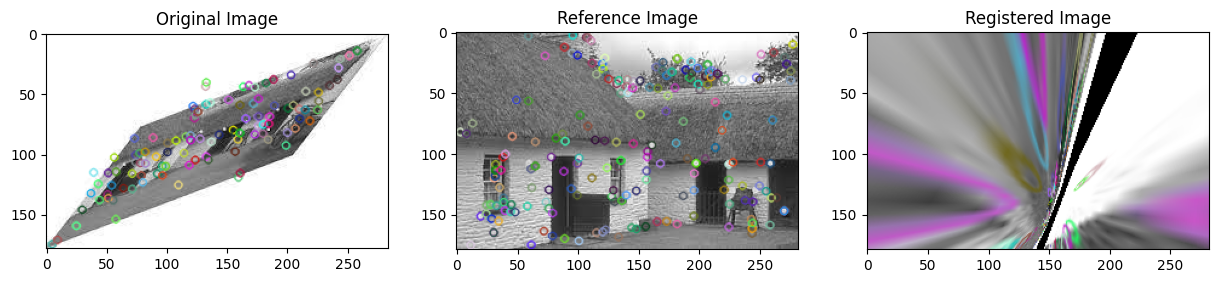

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Reference Image')

plt.subplot(1, 3, 3)
plt.imshow(registered_image, cmap='gray')
plt.title('Registered Image')